In [750]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [751]:
#CreditRisk_df.columns=CreditRisk_df.columns.str.strip()

In [752]:
LeadScore_df = pd.read_csv("Lead-analysis/LeadScore.csv", encoding='latin-1',parse_dates=['Web_Date'])
LeadScore_df

,Full_Name,Requested_Amount,Web_Amount to Borrow,Amount to Borrow,Annual_Revenue,Web_Gross Annual Sales,Gross_Annual_Sales,Lead_Score,LeadID,Self Graded Credit,Lead_Self_Graded_Credit,Is_Submitted,Web_Ad Outlet,Ad_Outlet,Web_Date,Ad_Outlet_Source,Is_Funded
0,David Harris,NaN,"$10,000 to $25,000","$10,000 to $25,000",NaN,"Less than $100,000","Less than $100,000",11,00Q4u00001eYBsYEAW,2.0,2.0,0,101.0,101.0,2021-04-11,NaN,0
1,Pedro Rodriguez,NaN,NaN,"150,000.00",NaN,NaN,$500k-$1mm,8,00Q4u00001cJlowEAC,NaN,NaN,1,1105.0,1105.0,2019-05-02,Digital - Affiliate,0
2,Lashandra Fulcher,NaN,NaN,"$10,000 to $25,000",NaN,NaN,NaN,24,00Q4u00001fOHswEAG,NaN,3.0,1,1119.0,1119.0,2021-06-08,Digital - Affiliate,0
3,Gary Nunez,NaN,NaN,"$25,000 to $50,000",NaN,NaN,$100k-$200k,24,00Q4u00001ebawUEAQ,NaN,3.0,1,1119.0,1119.0,2021-05-03,Digital - Affiliate,0
4,Sonja Williams,NaN,NaN,"$10,000 to $25,000",NaN,NaN,$1mm+,24,00Q4u00001f1eZyEAI,NaN,3.0,1,1119.0,1119.0,2021-05-09,Digital - Affiliate,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22829,Richard Hamlett,50000.0,NaN,NaN,150000.0,NaN,NaN,24,00Q4u00001eb1gBEAQ,4.0,4.0,0,1101.0,1101.0,2021-04-28,Lending Tree,0
22830,Gregory Jones,NaN,NaN,"$5,000 to $10,000",NaN,NaN,"Less than $100,000",14,00Q4u00001eapmMEAQ,NaN,4.0,1,1280.0,1000.0,2021-04-26,Strategic Partners,0
22831,Carl Baltes,NaN,"25,000.00","25,000.00",NaN,"Less than $100,000","Less than $100,000",6,00Q4u00001eYNzFEAW,NaN,NaN,0,1202.0,NaN,2021-04-13,Strategic Partners,0
22832,emeline akuta,NaN,"$100,000 or More","$100,000 or More",NaN,$100k-$200k,$100k-$200k,14,00Q4u00001e3z4PEAQ,3.0,3.0,0,1226.0,1226.0,2021-04-01,Strategic Partners,0


In [753]:
LeadScore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22834 entries, 0 to 22833
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Full_Name                22834 non-null  object        
 1   Requested_Amount         9177 non-null   float64       
 2   Web_Amount to Borrow     13433 non-null  object        
 3   Amount to Borrow         13729 non-null  object        
 4   Annual_Revenue           15712 non-null  float64       
 5   Web_Gross Annual Sales   14420 non-null  object        
 6   Gross_Annual_Sales       17037 non-null  object        
 7   Lead_Score               22834 non-null  int64         
 8   LeadID                   22834 non-null  object        
 9   Self Graded Credit       21891 non-null  float64       
 10  Lead_Self_Graded_Credit  22402 non-null  float64       
 11  Is_Submitted             22834 non-null  int64         
 12  Web_Ad Outlet            22514 n

In [754]:
LeadScore_df.isnull().sum()

Full_Name                      0
Requested_Amount           13657
Web_Amount to Borrow        9401
Amount to Borrow            9105
Annual_Revenue              7122
Web_Gross Annual Sales      8414
Gross_Annual_Sales          5797
Lead_Score                     0
LeadID                         0
Self Graded Credit           943
Lead_Self_Graded_Credit      432
Is_Submitted                   0
Web_Ad Outlet                320
Ad_Outlet                    349
Web_Date                       0
Ad_Outlet_Source               1
Is_Funded                      0
dtype: int64

In [755]:
LeadScore_df.columns

Index(['Full_Name', 'Requested_Amount', 'Web_Amount to Borrow',
       'Amount to Borrow', 'Annual_Revenue', 'Web_Gross Annual Sales',
       'Gross_Annual_Sales', 'Lead_Score', 'LeadID ', 'Self Graded Credit',
       'Lead_Self_Graded_Credit', 'Is_Submitted', 'Web_Ad Outlet', 'Ad_Outlet',
       'Web_Date', 'Ad_Outlet_Source', 'Is_Funded'],
      dtype='object')

In [756]:
LeadScore_df['Amount to Borrow'] = LeadScore_df['Amount to Borrow'].str.replace(',','')

In [757]:
LeadScore_df['Requested_Amount'].fillna(LeadScore_df['Amount to Borrow'], inplace = True)
LeadScore_df['Gross_Annual_Sales'].fillna(LeadScore_df['Web_Gross Annual Sales'], inplace = True)
LeadScore_df['Lead_Self_Graded_Credit'].fillna(LeadScore_df['Self Graded Credit'], inplace = True)
LeadScore_df['Amount to Borrow'].fillna(LeadScore_df['Web_Amount to Borrow'], inplace = True)
LeadScore_df['Ad_Outlet'].fillna(LeadScore_df['Web_Ad Outlet'], inplace = True)
LeadScore_df['Annual_Revenue'].fillna(LeadScore_df['Web_Gross Annual Sales'], inplace = True)

In [758]:
LeadScore_df['Requested_Amount'] = LeadScore_df['Requested_Amount'].str.replace(',','')

In [759]:
LeadScore_df = LeadScore_df.drop(['Web_Amount to Borrow', 'Web_Gross Annual Sales', 'Self Graded Credit','Web_Ad Outlet'], axis=1)
LeadScore_df.head()

,Full_Name,Requested_Amount,Amount to Borrow,Annual_Revenue,Gross_Annual_Sales,Lead_Score,LeadID,Lead_Self_Graded_Credit,Is_Submitted,Ad_Outlet,Web_Date,Ad_Outlet_Source,Is_Funded
0,David Harris,$10000 to $25000,$10000 to $25000,"Less than $100,000","Less than $100,000",11,00Q4u00001eYBsYEAW,2.0,0,101.0,2021-04-11,NaN,0
1,Pedro Rodriguez,150000.00,150000.00,NaN,$500k-$1mm,8,00Q4u00001cJlowEAC,NaN,1,1105.0,2019-05-02,Digital - Affiliate,0
2,Lashandra Fulcher,$10000 to $25000,$10000 to $25000,NaN,NaN,24,00Q4u00001fOHswEAG,3.0,1,1119.0,2021-06-08,Digital - Affiliate,0
3,Gary Nunez,$25000 to $50000,$25000 to $50000,NaN,$100k-$200k,24,00Q4u00001ebawUEAQ,3.0,1,1119.0,2021-05-03,Digital - Affiliate,0
4,Sonja Williams,$10000 to $25000,$10000 to $25000,NaN,$1mm+,24,00Q4u00001f1eZyEAI,3.0,1,1119.0,2021-05-09,Digital - Affiliate,0


In [760]:
LeadScore_df = LeadScore_df.dropna()
LeadScore_df

,Full_Name,Requested_Amount,Amount to Borrow,Annual_Revenue,Gross_Annual_Sales,Lead_Score,LeadID,Lead_Self_Graded_Credit,Is_Submitted,Ad_Outlet,Web_Date,Ad_Outlet_Source,Is_Funded
38,FLOYD JORDAN,25000.00,25000.00,"Less than $100,000","Less than $100,000",8,00Q4u00001eb8MWEAY,1.0,0,1105.0,2021-04-29,Digital - Affiliate,0
39,Adanya Cleveland,5000.00,5000.00,"Less than $100,000","Less than $100,000",8,00Q4u00001eXtEuEAK,1.0,0,1118.0,2021-04-07,Digital - Affiliate,0
53,Darren Anderson,$100000 or More,$100000 or More,$1mm+,$1mm+,24,00Q4u00001ebO6QEAU,2.0,0,1119.0,2021-04-30,Digital - Affiliate,0
55,Arthur Thomas,$100000 or More,$100000 or More,$1mm+,$1mm+,24,00Q4u00001eaxWDEAY,2.0,0,1119.0,2021-04-27,Digital - Affiliate,0
57,Janis Roberts,$100000 or More,$100000 or More,$1mm+,$1mm+,24,00Q4u00001ebJI7EAM,2.0,0,1119.0,2021-04-29,Digital - Affiliate,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14960,Guy Martin,$10000 to $25000,$10000 to $25000,"Less than $100,000","Less than $100,000",14,00Q4u00001eY1mHEAS,3.0,0,1101.0,2021-04-08,Lending Tree,0
16240,Keya Sleister,$25000 to $50000,$25000 to $50000,$100k-$200k,$100k-$200k,15,00Q4u00001eYl2SEAS,3.0,0,1101.0,2021-04-14,Lending Tree,0
16381,John Meharg,25000.00,25000.00,"Less than $100,000","Less than $100,000",17,00Q4u00001b183MEAQ,4.0,1,1101.0,2020-09-10,Lending Tree,0
17763,Manuel Gonzalez,$25000 to $50000,$25000 to $50000,$100k-$200k,$100k-$200k,18,00Q4u00001ebmKcEAI,4.0,0,1101.0,2021-05-04,Lending Tree,0


In [761]:
LeadScore_df.groupby('Is_Submitted').mean()['Lead_Self_Graded_Credit'].round(decimals=2)

Is_Submitted
0    3.16
1    3.15
Name: Lead_Self_Graded_Credit, dtype: float64

In [762]:
LeadScore_df.groupby('Ad_Outlet_Source').sum()['Is_Submitted'].round(decimals=2)

Ad_Outlet_Source
Digital - Affiliate     18
Digital-Organic        155
Digital-PPC             95
Direct                 766
Lending Tree             1
Strategic Partners       0
Name: Is_Submitted, dtype: int64

In [763]:
LeadScore_df.groupby('Is_Submitted').mean()['Lead_Score'].round(decimals=2)

Is_Submitted
0    14.48
1    14.82
Name: Lead_Score, dtype: float64

In [764]:
from sklearn.preprocessing import LabelEncoder
Amount_dict = {'$10000 to $25000':17500.0,'$100000 or More':100000.0,'100000 or More':100000.0, '$25000 to $50000':37500.0,'$5000 to $10000':7500.0,'$50000 to $100000':75000.0,'0':0}

LeadScore_df['Requested_Amount'].replace(Amount_dict, inplace=True)

Sales_dict = {"$100k-$200k":150000.0, "$1mm+":1000000.0, "$200k-$500k":350000.0, "$500k-$1mm":750000.0, 'Less than $100,000':35000.0}
             
LeadScore_df['Gross_Annual_Sales'].replace(Sales_dict, inplace=True)

Revenue_dict = {"$100k-$200k":150000.0, "$1mm+":1000000.0, "$200k-$500k":350000.0, "$500k-$1mm":750000.0, 'Less than $100,000':35000.0}

LeadScore_df['Annual_Revenue'].replace(Revenue_dict, inplace=True)

Borrow_dict = {'$10000 to $25000':17500.0,'$100000 or More':100000.0,'100000 or More':100000.0,'$25000 to $50000':37500.0,'$5000 to $10000':7500.0,'$50000 to $100000':75000.0,'0':0}

LeadScore_df['Amount to Borrow'].replace(Borrow_dict, inplace=True)

LeadScore_df.sample(5)

,Full_Name,Requested_Amount,Amount to Borrow,Annual_Revenue,Gross_Annual_Sales,Lead_Score,LeadID,Lead_Self_Graded_Credit,Is_Submitted,Ad_Outlet,Web_Date,Ad_Outlet_Source,Is_Funded
8368,BERNARD HANZER,17500.0,17500.0,0.0,35000.0,14,00Q4u00001e2rCXEAY,3.0,0,5028.0,2021-05-08,Direct,0
7169,AWADALLA RANOFER,37500.0,37500.0,0.0,350000.0,13,00Q4u00001eaKRGEA2,2.0,0,5061.0,2021-06-29,Direct,0
11968,DUNIA ALVARADO-RODRIGUEZ,17500.0,17500.0,0.0,35000.0,17,00Q4u00001eZwgdEAC,4.0,0,5081.0,2021-05-15,Direct,0
327,Anthony Bailey,37500.0,37500.0,750000.0,750000.0,24,00Q4u00001f3TmlEAE,3.0,0,1119.0,2021-05-17,Digital - Affiliate,0
6273,JASON JACKSON,7500.0,7500.0,0.0,35000.0,11,00Q4u00001eZdNbEAK,3.0,1,5071.0,2021-06-13,Direct,0


In [765]:
LeadScore_df["Requested_Amount"]= pd.to_numeric(LeadScore_df["Requested_Amount"], downcast="float")
LeadScore_df["Amount to Borrow"]= pd.to_numeric(LeadScore_df["Amount to Borrow"], downcast="float")
LeadScore_df.head()                                                 

,Full_Name,Requested_Amount,Amount to Borrow,Annual_Revenue,Gross_Annual_Sales,Lead_Score,LeadID,Lead_Self_Graded_Credit,Is_Submitted,Ad_Outlet,Web_Date,Ad_Outlet_Source,Is_Funded
38,FLOYD JORDAN,25000.0,25000.0,35000.0,35000.0,8,00Q4u00001eb8MWEAY,1.0,0,1105.0,2021-04-29,Digital - Affiliate,0
39,Adanya Cleveland,5000.0,5000.0,35000.0,35000.0,8,00Q4u00001eXtEuEAK,1.0,0,1118.0,2021-04-07,Digital - Affiliate,0
53,Darren Anderson,100000.0,100000.0,1000000.0,1000000.0,24,00Q4u00001ebO6QEAU,2.0,0,1119.0,2021-04-30,Digital - Affiliate,0
55,Arthur Thomas,100000.0,100000.0,1000000.0,1000000.0,24,00Q4u00001eaxWDEAY,2.0,0,1119.0,2021-04-27,Digital - Affiliate,0
57,Janis Roberts,100000.0,100000.0,1000000.0,1000000.0,24,00Q4u00001ebJI7EAM,2.0,0,1119.0,2021-04-29,Digital - Affiliate,0


In [766]:
LeadScore_df.groupby('Is_Funded').mean()['Gross_Annual_Sales'].round(decimals=2)

Is_Funded
0    132027.35
1    291605.84
Name: Gross_Annual_Sales, dtype: float64

In [767]:
LeadScore_df.groupby('Is_Submitted').mean()['Requested_Amount'].round(decimals=2)

Is_Submitted
0    36990.359375
1    40601.449219
Name: Requested_Amount, dtype: float32

In [768]:
LeadScore_df.groupby('Is_Submitted').mean()['Annual_Revenue'].round(decimals=2)

Is_Submitted
0    55992.44
1    79853.96
Name: Annual_Revenue, dtype: float64

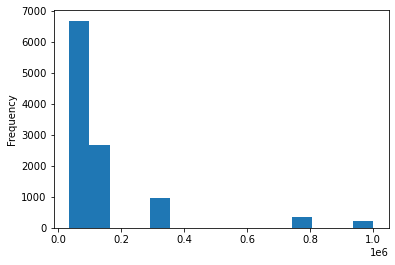

In [769]:
ax = LeadScore_df['Gross_Annual_Sales'].plot.hist(bins=15)

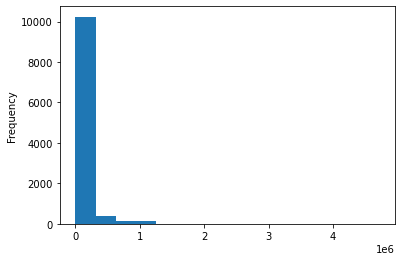

In [770]:
ax = LeadScore_df['Annual_Revenue'].plot.hist(bins=15)

In [771]:
#fig, axs = plt.subplots(figsize = (12,6))
#sns.countplot(x = 'Ad_Outlet_Source', hue= "Is_Submitted", LeadScore_df = LeadScore_df)
#xticks(rotation = 90)

In [772]:
Outlet_dict = {"Digital - Affiliate":0, "Digital-Organic":1, "Direct":2 ,"Digital-PPC":3, "Lending Tree":4, 'Strategic Partners':5}
             
LeadScore_df['Ad_Outlet_Source'].replace(Outlet_dict, inplace=True)

In [773]:
#pd.options.display.float_format = '{:,.2f}'.format

In [774]:
LeadScore_df.dtypes

Full_Name                          object
Requested_Amount                  float32
Amount to Borrow                  float32
Annual_Revenue                    float64
Gross_Annual_Sales                float64
Lead_Score                          int64
LeadID                             object
Lead_Self_Graded_Credit           float64
Is_Submitted                        int64
Ad_Outlet                         float64
Web_Date                   datetime64[ns]
Ad_Outlet_Source                    int64
Is_Funded                           int64
dtype: object

array([<AxesSubplot:title={'center':'Gross_Annual_Sales'}, xlabel='Is_Submitted'>,
       <AxesSubplot:title={'center':'Amount to Borrow'}, xlabel='Is_Submitted'>],
      dtype=object)

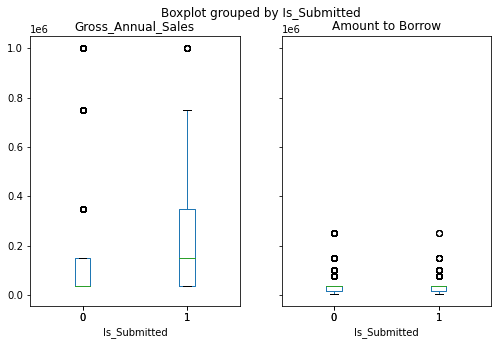

In [775]:
LeadScore_df.boxplot(by ='Is_Submitted', column=['Gross_Annual_Sales','Amount to Borrow'], grid=False, figsize=(8,5))

In [776]:
LeadScore_df.describe()

,Requested_Amount,Amount to Borrow,Annual_Revenue,Gross_Annual_Sales,Lead_Score,Lead_Self_Graded_Credit,Is_Submitted,Ad_Outlet,Ad_Outlet_Source,Is_Funded
count,10885.000000,10885.000000,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000,10885.000000,10885.000000,10885.000000
mean,37336.554688,37336.554688,5.826131e+04,134035.829123,14.507487,3.15526,0.095085,4017.868167,1.998071,0.012586
std,33554.761719,33554.761719,1.625495e+05,194662.434576,3.147084,0.91987,0.293346,1779.357354,0.576312,0.111485
min,5000.000000,5000.000000,0.000000e+00,35000.000000,5.000000,1.00000,0.000000,1000.000000,0.000000,0.000000
25%,17500.000000,17500.000000,0.000000e+00,35000.000000,13.000000,3.00000,0.000000,1119.000000,2.000000,0.000000
50%,37500.000000,37500.000000,0.000000e+00,35000.000000,14.000000,3.00000,0.000000,5061.000000,2.000000,0.000000
75%,37500.000000,37500.000000,3.500000e+04,150000.000000,17.000000,4.00000,0.000000,5061.000000,2.000000,0.000000
max,250000.000000,250000.000000,4.725000e+06,1000000.000000,24.000000,4.00000,1.000000,5192.000000,5.000000,1.000000


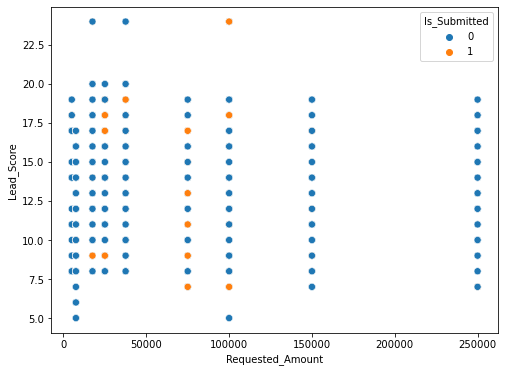

In [777]:
#%matplotlib inline
plt.figure(figsize=(8,6))
sns.scatterplot("Requested_Amount","Lead_Score", hue="Is_Submitted", data=LeadScore_df, s=50)
plt.show()

In [778]:
Submitted = (sum(LeadScore_df["Is_Submitted"])/len(LeadScore_df['Is_Submitted'].index))*100
Submitted

9.508497932935231

In [779]:
LeadScore_df.corr()

,Requested_Amount,Amount to Borrow,Annual_Revenue,Gross_Annual_Sales,Lead_Score,Lead_Self_Graded_Credit,Is_Submitted,Ad_Outlet,Ad_Outlet_Source,Is_Funded
Requested_Amount,1.000000,1.000000,0.222259,0.272665,-0.069736,-0.213117,0.031569,-0.160655,0.155773,0.040716
Amount to Borrow,1.000000,1.000000,0.222259,0.272665,-0.069736,-0.213117,0.031569,-0.160655,0.155773,0.040716
Annual_Revenue,0.222259,0.222259,1.000000,0.584387,0.177248,-0.120623,0.043062,-0.348852,-0.198623,0.036905
Gross_Annual_Sales,0.272665,0.272665,0.584387,1.000000,0.170457,-0.193575,0.095505,-0.059057,-0.164869,0.091392
Lead_Score,-0.069736,-0.069736,0.177248,0.170457,1.000000,0.758830,0.031823,-0.143131,-0.196873,0.005362
Lead_Self_Graded_Credit,-0.213117,-0.213117,-0.120623,-0.193575,0.758830,1.000000,-0.003301,0.028500,0.055678,-0.030704
Is_Submitted,0.031569,0.031569,0.043062,0.095505,0.031823,-0.003301,1.000000,0.002119,-0.050001,0.278057
Ad_Outlet,-0.160655,-0.160655,-0.348852,-0.059057,-0.143131,0.028500,0.002119,1.000000,0.003587,0.008935
Ad_Outlet_Source,0.155773,0.155773,-0.198623,-0.164869,-0.196873,0.055678,-0.050001,0.003587,1.000000,-0.013922
Is_Funded,0.040716,0.040716,0.036905,0.091392,0.005362,-0.030704,0.278057,0.008935,-0.013922,1.000000


In [780]:
X = LeadScore_df[['Requested_Amount','Annual_Revenue','Amount to Borrow','Gross_Annual_Sales',
                  'Ad_Outlet_Source','Lead_Score','Lead_Self_Graded_Credit']]

y = LeadScore_df[['Is_Submitted']]

In [781]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [739]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [740]:
import statsmodels.api as sm

logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Is_Submitted   No. Observations:                 7619
Model:                            GLM   Df Residuals:                     7612
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2365.2
Date:                Wed, 11 Aug 2021   Deviance:                       4730.5
Time:                        13:08:52   Pearson chi2:                 7.53e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1933      0.215    -10.189      0.000      -2.615      -1.771
x1             0.3198      0.147      2.177      0.029       0.032       0.608
x2            -3.1295      1.267     -2.471      0.013      -5.612      -0.647
x3             0.3198      0.147      2.177      0.029       0.032       0.608
x4             1.3890      0.205      6.778      0.000       0.987       1.791
x5            -0.9296      0.311     -2.992      0.003      -1.539      -0.321
x6            -0.1560      0.435     -0.359      0.720      -1.009       0.697
x7             0.3624      0.238      1.522      0.128      -0.104       0.829
==============================================================================
"""

In [782]:
X_train.shape, y_train.shape

((7619, 7), (7619, 1))

In [783]:
X_test.shape, y_test.shape

((3266, 7), (3266, 1))

In [299]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 0.004864
Feature 1: 0.006890
Feature 2: 0.001117
Feature 3: 0.011767
Feature 4: 0.006396
Feature 5: 0.001534
Feature 6: 0.000374


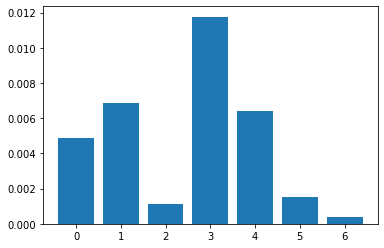

In [300]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [743]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [744]:
from sklearn.feature_selection import RFE

rfe = RFE(model, 15)             # running RFE with 7 variables as output
rfe = rfe.fit(X_train, y_train)

In [745]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True])

In [784]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [785]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Requested_Amount', True, 1),
 ('Annual_Revenue', True, 1),
 ('Amount to Borrow', True, 1),
 ('Gross_Annual_Sales', True, 1),
 ('Ad_Outlet_Source', True, 1),
 ('Lead_Score', True, 1),
 ('Lead_Self_Graded_Credit', True, 1)]

In [786]:
col = X_train.columns[rfe.support_]
col

Index(['Requested_Amount', 'Annual_Revenue', 'Amount to Borrow',
       'Gross_Annual_Sales', 'Ad_Outlet_Source', 'Lead_Score',
       'Lead_Self_Graded_Credit'],
      dtype='object')

In [788]:
X_train_sm = sm.add_constant(X_train[col].values)

X_train_sm = sm.add_constant(X_train[col].values)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Is_Submitted   No. Observations:                 7619
Model:                            GLM   Df Residuals:                     7612
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2365.2
Date:                Wed, 11 Aug 2021   Deviance:                       4730.5
Time:                        13:15:05   Pearson chi2:                 7.53e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4056      0.048    -50.141      0.000      -2.500      -2.312
x1             0.0261      0.012      2.177      0.029       0.003       0.050
x2            -0.0232      0.009     -2.471      0.013      -0.042      -0.005
x3             0.0261      0.012      2.177      0.029       0.003       0.050
x4             0.1655      0.024      6.778      0.000       0.118       0.213
x5            -0.2324      0.078     -2.992      0.003      -0.385      -0.080
x6            -0.0328      0.092     -0.359      0.720      -0.212       0.147
x7             0.1208      0.079      1.522      0.128      -0.035       0.276
==============================================================================
"""

In [791]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

array([0.08614564, 0.08614564, 0.08100525, 0.08602987, 0.10413497,
       0.08614564, 0.10328643, 0.08602987, 0.0814452 , 0.11688322])

In [793]:
y_train_pred = y_train_pred.reshape(-1)
y_train_pred[:10]

array([0.08614564, 0.08614564, 0.08100525, 0.08602987, 0.10413497,
       0.08614564, 0.10328643, 0.08602987, 0.0814452 , 0.11688322])

In [794]:
# find the predicted-prob
Submitted_prob = y_train_pred
Submitted = y_train.values
y_train_pred_final = pd.DataFrame(Submitted,Submitted_prob)
                                  
                                   
y_train_pred_final['Prospect_ID'] = y_train.index

y_train_pred_final

,0,Prospect_ID
0.086146,0,11415
0.086146,0,11804
0.081005,0,8832
0.086030,0,9157
0.104135,0,13830
...,...,...
0.091166,0,7437
0.072062,0,5727
0.090346,0,12726
0.104135,0,13749


In [795]:
y_train_pred_final.reset_index(inplace=True)

In [796]:
y_train_pred_final.rename(columns = {"index":"Submitted_Prob", 0:"Submitted"}, inplace=True)

In [797]:
y_train_pred_final['predicted'] = y_train_pred_final.Submitted_Prob.apply(lambda x: 1 if x > 0.155 else 0)

# Let's see the head
y_train_pred_final.head()

,Submitted_Prob,Submitted,Prospect_ID,predicted
0,0.086146,0,11415,0
1,0.086146,0,11804,0
2,0.081005,0,8832,0
3,0.086030,0,9157,0
4,0.104135,0,13830,0


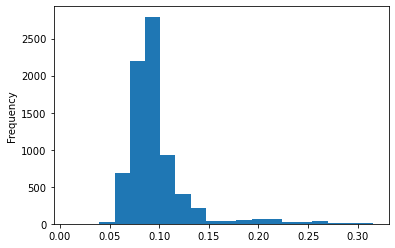

In [798]:
ax = y_train_pred_final['Submitted_Prob'].plot.hist(bins=20)

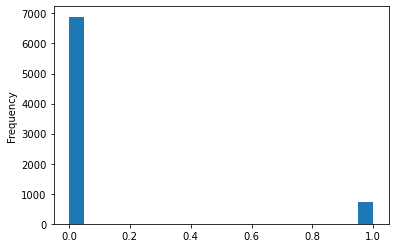

In [799]:
ax = y_train_pred_final['Submitted'].plot.hist(bins=20)

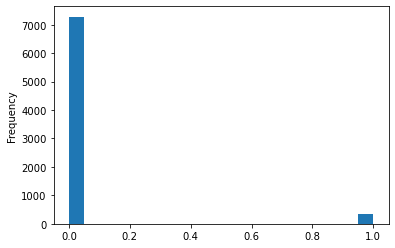

In [800]:
ax = y_train_pred_final['predicted'].plot.hist(bins=20)

In [802]:
y_train_pred_final.to_csv('Sub_prob.csv', index = True)

In [119]:
accuracy_score(y_test,y_pred, normalize=True) * 100

90.60012247397428

In [120]:
print("Training score:", model.score(X_train, y_train))

Training score: 0.9044494028087675


In [527]:
KNN_model = KNeighborsClassifier()

In [533]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
accuracy_KNN = cross_val_score(KNN_model, X, y, cv=cv, scoring='accuracy')

print("Cross Validation Scores for Log KNN: {}".format(accuracy_KNN))
print("Mean Accuracy Score for KNN: {}".format(np.mean(accuracy_KNN)))

Cross Validation Scores for Log KNN: [0.78089113 0.77905374 0.70923289 0.73036288 0.69820854]
Mean Accuracy Score for KNN: 0.7395498392282958


In [534]:
param_grid = {'n_neighbors': [1,2,3,4,5,6]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X, y)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'n_neighbors': 2}
Best Cross Vlidation Score: 0.8015617822691778


In [535]:
parameters = {'splitter': ('best','random'),
             'max_depth': [2,4,6],
             'max_features':[2,4,6, None]}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'max_depth': 2, 'max_features': 2, 'splitter': 'best'}

In [536]:
model = DecisionTreeClassifier(splitter=grid_search.best_params_['splitter'],
                                       max_depth=grid_search.best_params_['max_depth'],
                                      max_features=grid_search.best_params_['max_features'])

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_features=2)

In [537]:
y_train_hat = model.predict(X_train)
y_pred = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize=True) * 100

out_of_sample_acc = accuracy_score(y_test,y_pred, normalize=True) * 100

print("In-sample Accuracy:", in_sample_acc)
print("Out-of-sample Accuracy:", out_of_sample_acc)

In-sample Accuracy: 90.4446894524072
Out-of-sample Accuracy: 90.63188831741367


In [538]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Confusion Matrix
[[2467    0]
 [ 255    0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2467
           1       0.00      0.00      0.00       255

    accuracy                           0.91      2722
   macro avg       0.45      0.50      0.48      2722
weighted avg       0.82      0.91      0.86      2722



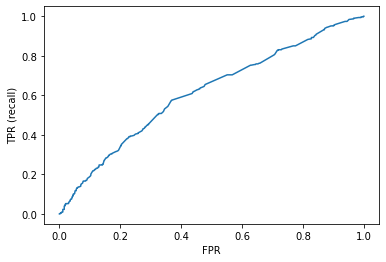

In [511]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");

In [516]:
y_pred_prob =model.predict_proba(X_test)[:,1]
fpr,tpr, threshold= roc_curve(y_test,y_pred_prob)

In [518]:
from sklearn.metrics import roc_auc_score

logreg_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) 
print("AUC for logreg: {:.3f}".format(logreg_auc))

AUC for logreg: 0.613


In [520]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model,X,y, cv=5, scoring='roc_auc')
print(cv_scores)

[0.52158954 0.29607519 0.54778195 0.52778146 0.56825204]


In [539]:
feature_names = X = LeadScore_df[['Requested_Amount','Annual_Revenue','Amount to Borrow','Gross_Annual_Sales',
                  'Ad_Outlet_Source','Lead_Score','Lead_Self_Graded_Credit']]

In [540]:
#print(feature_names)
model.feature_importances_

array([0.31794016, 0.46187651, 0.        , 0.        , 0.22018333,
       0.        , 0.        ])

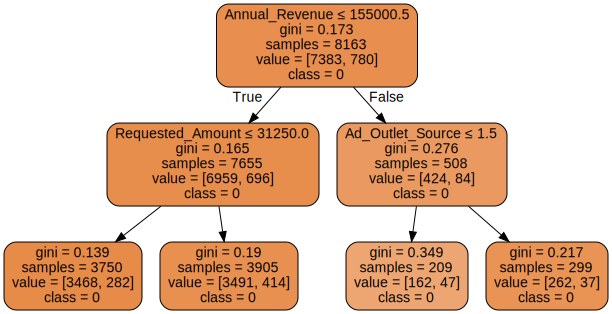

<Figure size 1440x1080 with 0 Axes>

In [541]:
from sklearn import tree
import graphviz
fig = plt.figure(figsize=(20,15))

class_names = ['0', '1']
feature_names = X.columns

dot_data = tree.export_graphviz(model, 
                  feature_names=feature_names, 
                  class_names=class_names,  
                  filled=True, rounded=True,  
                  special_characters=True,
                  out_file=None)
                           
graph = graphviz.Source(dot_data)
graph

In [542]:
graph.render("decision_tree1_graphviz")
'decision_tree1_graphviz.png'

'decision_tree1_graphviz.png'

In [543]:
## Calculating feature_importance = 
model.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_names, model.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'Feature_Importance'}, inplace = True)
feat_imp.sort_values(by=['Feature_Importance'], ascending=False).head()

,Feature_Importance
Annual_Revenue,0.461877
Requested_Amount,0.317940
Ad_Outlet_Source,0.220183
Amount to Borrow,0.000000
Gross_Annual_Sales,0.000000


In [133]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)

model.fit(X_train, y_train)

y_train_hat = model.predict(X_train)
y_pred = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize=True) * 100

out_of_sample_acc = accuracy_score(y_test,y_pred, normalize=True) * 100
print("In-sample Accuracy:", in_sample_acc)
print("Out-of-sample Accuracy:", out_of_sample_acc)

In-sample Accuracy: 91.17971334068358
Out-of-sample Accuracy: 90.41146216017634


In [257]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(0,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [258]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [259]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9897134459955915


In [40]:
#len(CreditRisk_merge['contract_number'].unique())